# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['busselton', 'mount isa', 'georgetown', 'santa comba', 'pevek', 'port elizabeth', 'cape town', 'zhangye', 'rikitea', 'punta arenas', 'jalu', 'govardhan', 'acajutla', 'avarua', 'banda aceh', 'atuona', 'dikson', 'ushuaia', 'jamestown', 'houma', 'mataura', 'balad', 'qaanaaq', 'tiksi', 'sisophon', 'ixtapa', 'taolanaro', 'ribeira grande', 'east london', 'kirakira', 'illoqqortoormiut', 'amapa', 'alyangula', 'port blair', 'toliary', 'dandong', 'yellowknife', 'chapais', 'port alfred', 'bluff', 'okhotsk', 'arraial do cabo', 'conneaut', 'flinders', 'pisco', 'puerto ayora', 'belyy yar', 'umm lajj', 'anadyr', 'cherskiy', 'kodiak', 'szczecin', 'tasiilaq', 'bredasdorp', 'kruisfontein', 'maniitsoq', 'new norfolk', 'mrirt', 'tessalit', 'victoria', 'saskylakh', 'kampong thum', 'wajid', 'ambilobe', 'bethel', 'meulaboh', 'kharan', 'babai', 'parras', 'grand gaube', 'hobart', 'forestville', 'half moon bay', 'benguela', 'chokurdakh', 'takoradi', 'miles city', 'severo-kurilsk', 'paamiut', 'bontang', 'reconq

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?q="
appid = "&APPID=d269652a1671495578edb029c7fc4b2e"

name = []
lat = []
lon = []
max_temp = []
humidity = []
cloud_coverage = []
wind_speed = []
city_country = []
city_dt = []
not_found = []

for x in range(len(cities)):

    response = requests.get(url + cities[x] + appid)
#    response_json.append(response.json())
    try:
        response_json = response.json()
        
        print(response_json["sys"]["id"], response_json["name"])

        name.append(response_json["name"])
        lat.append(response_json["coord"]["lat"])
        lon.append(response_json["coord"]["lon"])
        max_temp.append(response_json["main"]["temp_max"])
        humidity.append(response_json["main"]["humidity"])
        cloud_coverage.append(response_json["clouds"]["all"])
        wind_speed.append(response_json["wind"]["speed"])
        city_country.append(response_json["sys"]["country"])
        city_dt.append(response_json["dt"])
    except KeyError:
        not_found.append(cities[x])
        print("....what was i thinking", cities[x])

# Get one of the posts
#    post_response = requests.get(url + str(cities[x]) + appid)
#    print(post_response[name], post_response[lat])
# this works    print(response_json["id"], response_json["name"])
#    print(response_json["sys"]["id"], response_json["name"])
#    print(response_json["name"]
#          , response_json["coord"]["lat"]
#          , response_json["coord"]["lon"]
#          , response_json["main"]["temp_max"]
#          , response_json["main"]["humidity"]
#          , response_json["clouds"]["all"]
#          , response_json["wind"]["speed"]
#          , response_json["sys"]["country"]
#          , response_json["dt"]
#         )
    # Save post's JSON
#    response_json.append(post_response.json())
print(len(name))
#print(not_found)

2011706 Busselton
9495 Mount Isa
9429 George Town
2019170 Santa Comba
....what was i thinking pevek
1973 Port Elizabeth
1899 Cape Town
....what was i thinking zhangye
....what was i thinking rikitea
8487 Punta Arenas
....what was i thinking jalu
....what was i thinking govardhan
2016335 Acajutla
7271 Avarua
....what was i thinking banda aceh
....what was i thinking atuona
....what was i thinking dikson
8303 Ushuaia
4588 Jamestown
4444 Houma
2008959 Mataura
....what was i thinking balad
....what was i thinking qaanaaq
....what was i thinking tiksi
....what was i thinking sisophon
7156 Ixtapa
....what was i thinking taolanaro
....what was i thinking ribeira grande
1912 East London
....what was i thinking kirakira
....what was i thinking illoqqortoormiut
....what was i thinking amapa
9527 Alyangula
....what was i thinking port blair
....what was i thinking toliary
....what was i thinking dandong
1007 Yellowknife
859 Chapais
....what was i thinking port alfred
2008959 Bluff
....what was i 

8889 Nevel'sk
7537 Dubai
2021774 Mercedes
6674 Csurgó
9333 Banjar
....what was i thinking urdzhar
....what was i thinking golfito
....what was i thinking bestobe
....what was i thinking poum
....what was i thinking tura
....what was i thinking lavrentiya
7157 Pochutla
8474 Vila Velha
....what was i thinking evensk
2033035 Southbridge
....what was i thinking nalut
....what was i thinking rawson
....what was i thinking suba
9125 Diphu
....what was i thinking hofn
....what was i thinking polunochnoye
....what was i thinking paramonga
327 Saint-Ambroise
....what was i thinking tulun
8951 Talnakh
....what was i thinking lorengau
....what was i thinking presidencia roque saenz pena
5321 Portland
....what was i thinking verkhnyaya inta
3352 Russell
....what was i thinking awjilah
1029 Aklavik
....what was i thinking galiwinku
....what was i thinking tsihombe
951 Norman Wells
....what was i thinking asosa
....what was i thinking sao jose da coroa grande
2000330 Valea Ciorii
2011343 Bose
....wh

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {
    "city": name,
    "latitude": lat,
    "longitude": lon,
    "max_Temp": max_temp,
    "humidity": humidity,
    "cloud_coverage": cloud_coverage,
    "wind_speed": wind_speed,
    "city_country": city_country,
    "city_dt": city_dt
}

weather_data = pd.DataFrame(weather_dict)
weather_data

weather_data.to_csv("weather_data.csv", index=False, header=True)

#print(len(weather_dict))

#print(weather_dict)
print(weather_data)

               city  latitude  longitude  max_Temp  humidity  cloud_coverage  \
0         Busselton    -33.65     115.33    308.15         9              31   
1         Mount Isa    -20.73     139.50    310.15         7             100   
2       George Town      5.41     100.34    304.15        70              20   
3       Santa Comba     43.03      -8.81    288.15        88             100   
4    Port Elizabeth    -33.92      25.57    291.15        93              90   
..              ...       ...        ...       ...       ...             ...   
280         Kuusamo     65.97      29.18    269.15        92              90   
281        Barcelos     41.54      -8.62    287.15       100              75   
282    Río Gallegos    -51.62     -69.22    285.15        62              75   
283        Westport     41.14     -73.36    276.15        74              90   
284           Narón     43.52      -8.15    287.59        93             100   

     wind_speed city_country     city_d

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
#  Get the indices of cities that have humidity over 100%.


In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

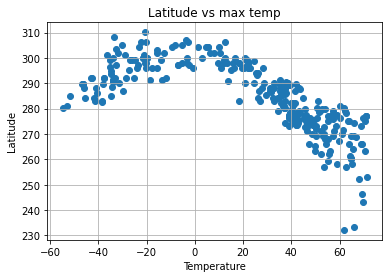

In [7]:
plt.scatter(weather_data["latitude"], weather_data["max_Temp"])
plt.title("Latitude vs max temp")
plt.xlabel("Temperature")
plt.ylabel("Latitude")
plt.grid(True)
plt.savefig("Latitude_vs_max_temp.png")

## Latitude vs. Humidity Plot

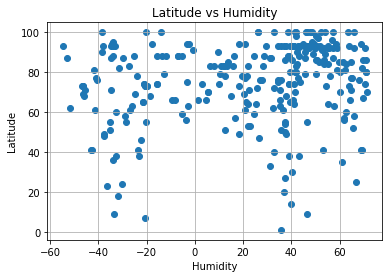

In [8]:
plt.scatter(weather_data["latitude"], weather_data["humidity"])
plt.title("Latitude vs Humidity")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.grid(True)
plt.savefig("Latitude_vs_Humidity.png")

## Latitude vs. Cloudiness Plot

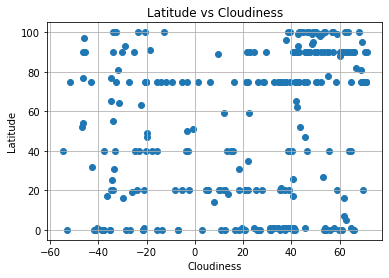

In [9]:
plt.scatter(weather_data["latitude"], weather_data["cloud_coverage"])
plt.title("Latitude vs Cloudiness")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.grid(True)
plt.savefig("Latitude_vs_Cloudiness.png")

## Latitude vs. Wind Speed Plot

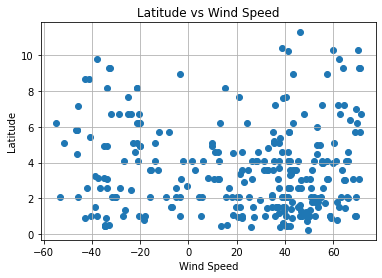

In [10]:
plt.scatter(weather_data["latitude"], weather_data["wind_speed"])
plt.title("Latitude vs Wind Speed")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.grid(True)
plt.savefig("Latitude_vs_Wind_Speed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

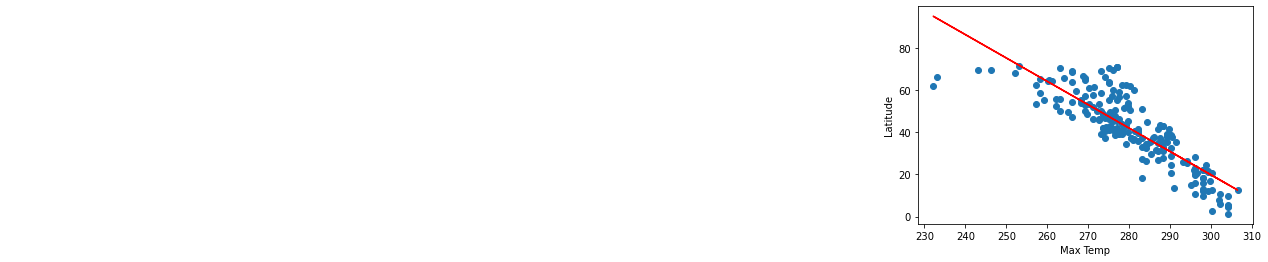

In [11]:
northern_hemi = weather_data.loc[(weather_data['latitude']>0)]
#print(northern_hemi)

southern_hemi = weather_data.loc[(weather_data['latitude']<0)]
#print(southern_hemi)

x_values = northern_hemi['max_Temp']
y_values = northern_hemi['latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

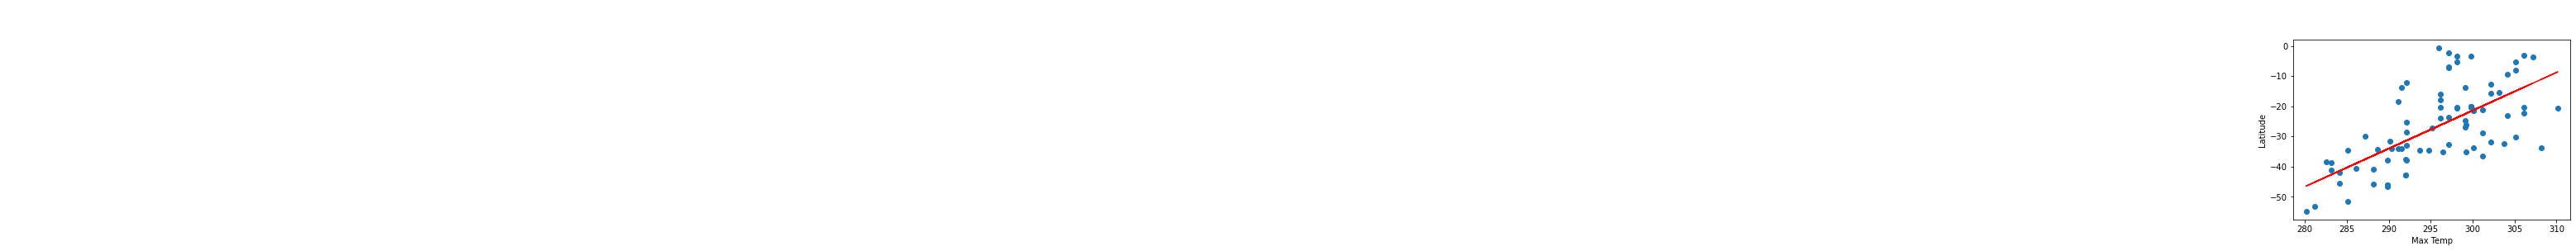

In [12]:
northern_hemi = weather_data.loc[(weather_data['latitude']>0)]
#print(northern_hemi)

southern_hemi = weather_data.loc[(weather_data['latitude']<0)]
#print(southern_hemi)

x_values = southern_hemi['max_Temp']
y_values = southern_hemi['latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

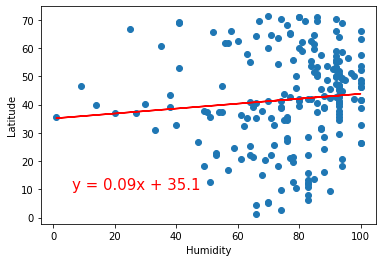

In [13]:
northern_hemi = weather_data.loc[(weather_data['latitude']>0)]
#print(northern_hemi)

southern_hemi = weather_data.loc[(weather_data['latitude']<0)]
#print(southern_hemi)

x_values = northern_hemi['humidity']
y_values = northern_hemi['latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

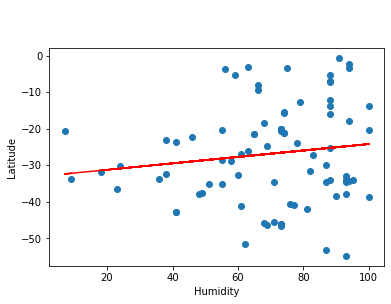

In [14]:
northern_hemi = weather_data.loc[(weather_data['latitude']>0)]
#print(northern_hemi)

southern_hemi = weather_data.loc[(weather_data['latitude']<0)]
#print(southern_hemi)

x_values = southern_hemi['humidity']
y_values = southern_hemi['latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

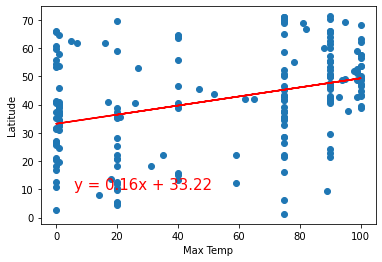

In [15]:
northern_hemi = weather_data.loc[(weather_data['latitude']>0)]
#print(northern_hemi)

southern_hemi = weather_data.loc[(weather_data['latitude']<0)]
#print(southern_hemi)

x_values = northern_hemi['cloud_coverage']
y_values = northern_hemi['latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

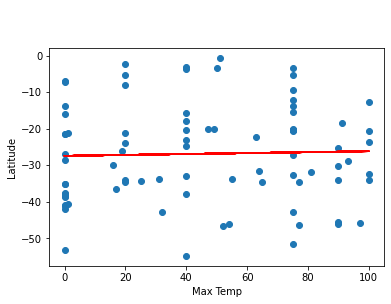

In [16]:
northern_hemi = weather_data.loc[(weather_data['latitude']>0)]
#print(northern_hemi)

southern_hemi = weather_data.loc[(weather_data['latitude']<0)]
#print(southern_hemi)

x_values = southern_hemi['cloud_coverage']
y_values = southern_hemi['latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

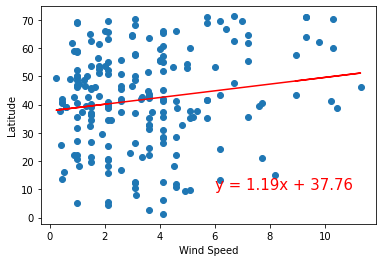

In [17]:
northern_hemi = weather_data.loc[(weather_data['latitude']>0)]
#print(northern_hemi)

southern_hemi = weather_data.loc[(weather_data['latitude']<0)]
#print(southern_hemi)

x_values = northern_hemi['wind_speed']
y_values = northern_hemi['latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

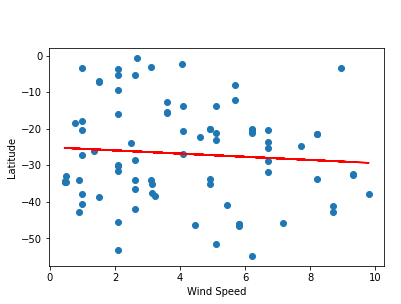

In [18]:
northern_hemi = weather_data.loc[(weather_data['latitude']>0)]
#print(northern_hemi)

southern_hemi = weather_data.loc[(weather_data['latitude']<0)]
#print(southern_hemi)

x_values = southern_hemi['wind_speed']
y_values = southern_hemi['latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.show()